# K-Nearest Neighbors

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Initialize randomly covariance and mean of our futur distribution**

In [ ]:
A = np.random.rand(2, 2)
B = np.random.rand(2, 2)
covA = np.dot(A, A.transpose())
covB = np.dot(B, B.transpose())
meanA = np.random.rand(2)
meanB = np.random.rand(2)

**Initialize our training distribution**

In [297]:
train_size = 10000

dsetA = np.random.multivariate_normal(mean=meanA, cov=covA, size=(train_size, 1)).reshape(train_size, 2)
dsetB = np.random.multivariate_normal(mean=meanB, cov=covB, size=(train_size, 1)).reshape(train_size, 2)
dsetA = np.hstack((dsetA, np.zeros((dsetA.shape[0], 1))))
dsetB = np.hstack((dsetB, np.ones((dsetA.shape[0], 1))))

**Visualize**

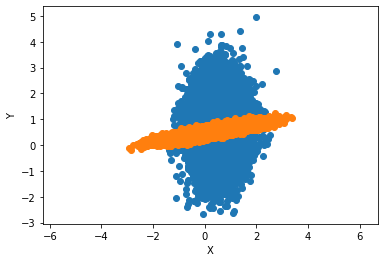

In [304]:
xA, yA = dsetA[:, :2], dsetA[:, 2]
xB, yB = dsetB[:, :2], dsetB[:, 2]
plt.scatter(xA[:, 0], xA[:, 1])
plt.scatter(xB[:, 0], xB[:, 1])
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Concat and shuffle to create our training set**

In [299]:
dset = np.concatenate((dsetA, dsetB), axis=0)
np.random.shuffle(dset)
x, y = dset[:, :2], dset[:, 2]

**Initialize our test set**

In [300]:
test_size = 50
dsetA_test = np.random.multivariate_normal(mean=meanA, cov=covA, size=(test_size, 1)).reshape(test_size, 2)
dsetB_test = np.random.multivariate_normal(mean=meanB, cov=covB, size=(test_size, 1)).reshape(test_size, 2)
dsetA_test = np.hstack((dsetA_test, np.zeros((dsetA_test.shape[0], 1))))
dsetB_test = np.hstack((dsetB_test, np.ones((dsetB_test.shape[0], 1))))

dset_test = np.concatenate((dsetA_test, dsetB_test), axis=0)
np.random.shuffle(dset_test)
x_test, y_test = dset_test[:, :2], dset_test[:, 2].astype(int)

**KNN Algorithm**  
The K-Nearest Neighbors - *among the train set* - of our test set data point predict the class thank to a majority vote.

In [301]:
K = 11
y_pred = list()
for xi_test in x_test:
    distance =  np.sqrt((xi_test[0] - x[:, 0])**2 + (xi_test[1] - x[:, 1])**2)
    distance = np.concatenate((distance.reshape(distance.shape[0], 1), y.reshape(y.shape[0], 1)), axis=1)
    distance = distance[distance[:,0].argsort()]
    y_pred.append(int(stats.mode(distance[:K, 1]).mode[0]))
    
y_pred = np.array(y_pred)

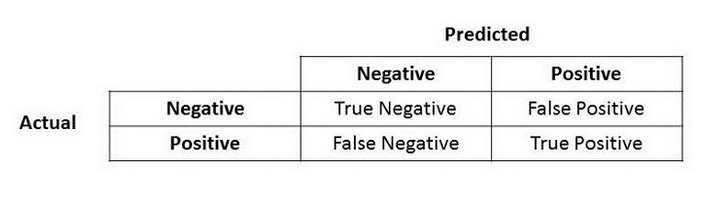

**Evaluating model**

In [302]:
pos_mask = y_test == 1
neg_mask = y_test == 0

TP = sum(y_test[pos_mask] == y_pred[pos_mask])
FN = sum(y_test[pos_mask] != y_pred[pos_mask])

TN = sum(y_test[neg_mask] == y_pred[neg_mask])
FP = sum(y_test[neg_mask] != y_pred[neg_mask])

print(f"TP: {TP} FP: {FP} TN: {TN} FN: {FN}")

TP: 49 FP: 6 TN: 44 FN: 1


$$precision = \frac{TruePositive}{TruePositive+FalsePositive}$$  
$$recall = \frac{TruePositive}{TruePositive+FalseNegative}$$  
$$F1_{score} = 2*\frac{precision*recall}{precision+recall}$$

In [306]:
precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1 = 2*(precision*recall)/(precision+recall)

print(f"precision: {precision}\nrecall: {recall}\nf1: {f1}")

precision: 0.8909090909090909
recall: 0.98
f1: 0.9333333333333333


In [257]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"TP: {tp} FP: {fp} TN: {tn} FN: {fn}")

TP: 38 FP: 5 TN: 45 FN: 12
